In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import wfdb

In [3]:

path = "C:/Studium/dsa/data"
#path = "C:/Users/Nils/Documents/HS-Mannheim/0000_MASTER/DSA/EKG_Prog/data"

categories_dict = {
'SB':    [426177001],
'AFIB':  [164889003, 164890007],
'GSVT':  [426761007, 713422000, 233896004, 233897008, 713422000],
'SR':    [426783006, 427393009]
}


data = {}
for cat_name in categories_dict.keys():
    print(f"Reading {cat_name}")
    with open(f'{path}/{cat_name}.pkl', 'rb') as f:
        records = pickle.load(f)
        data[cat_name] = records
        print(f"Length of {cat_name}: {len(records)}")

data_demographic = {'age':[], 'diag':[], 'gender':[]}
for cat_name, records in data.items():
    for record in records:
        age = record.comments[0].split(' ')[1]
        sex = record.comments[1].split(' ')[1]
        if age == 'NaN' or sex == 'NaN':
            continue
        # cut Age: from alter string 
        data_demographic['age'].append(int(age))
        data_demographic['diag'].append(cat_name)
        data_demographic['gender'].append(sex)

df_dgc = pd.DataFrame(data_demographic)

# Change from group to category
age_categories = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_dgc['age_group'] = pd.cut(df_dgc['age'], bins=age_categories)

Reading SB
Length of SB: 16559
Reading AFIB
Length of AFIB: 9839
Reading GSVT
Length of GSVT: 948
Reading SR
Length of SR: 9720


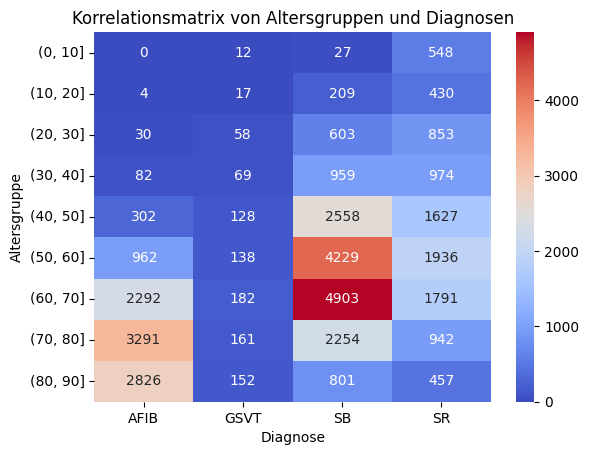

In [4]:
# Correlation matrix
corr_matrix_age_diag= pd.crosstab(df_dgc['age_group'], df_dgc['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_age_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korrelationsmatrix von Altersgruppen und Diagnosen')
plt.xlabel('Diagnose')
plt.ylabel('Altersgruppe')
plt.show()

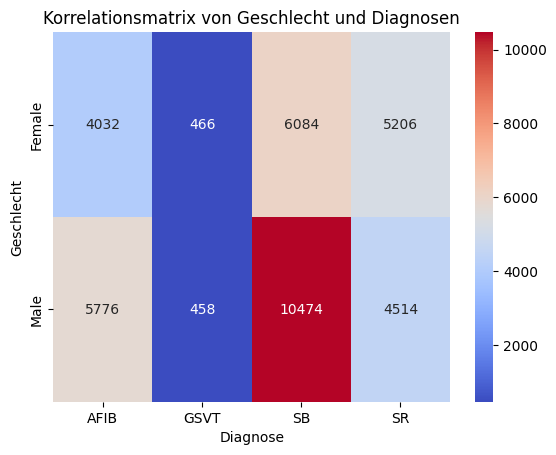

In [5]:
# cut out sex 'unknown' (because only one occurence)
df_dgc_bineary = df_dgc[df_dgc['gender'] != 'Unknown']
# Correlation matrix
corr_matrix_sex_diag = pd.crosstab(df_dgc_bineary['gender'], df_dgc_bineary['diag'])

# Plot the correlation matrix
sns.heatmap(corr_matrix_sex_diag, annot=True, cmap='coolwarm', fmt='d')
plt.title('Korrelationsmatrix von Geschlecht und Diagnosen')
plt.xlabel('Diagnose')
plt.ylabel('Geschlecht')
plt.show()

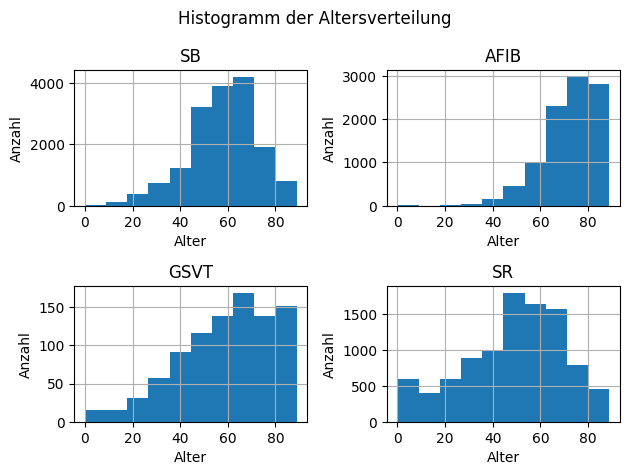

In [6]:
# 4 subplots for each diagnosis a histrgramm for the age
fig, axs = plt.subplots(2, 2)
fig.suptitle('Histogramm der Altersverteilung')
for i, cat_name in enumerate(categories_dict.keys()):
    ax = axs[i // 2, i % 2]
    df_dgc[df_dgc['diag'] == cat_name]['age'].hist(ax=ax)
    ax.set_title(cat_name)
    ax.set_xlabel('Alter')
    ax.set_ylabel('Anzahl')
    # add some space between the subplots
plt.tight_layout()
plt.show()

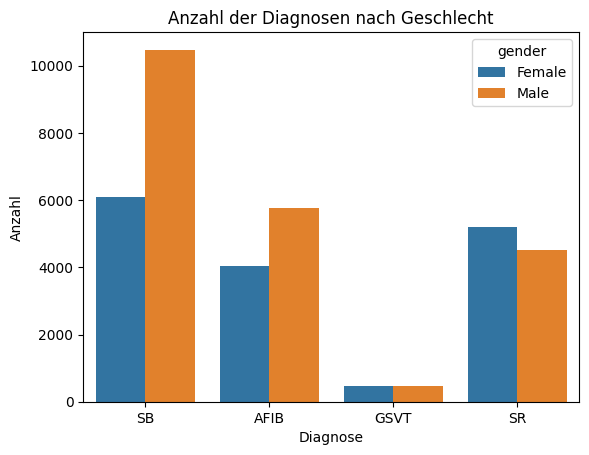

In [7]:
# a barplot for each category with the age grpuoped besides each other
fig, ax = plt.subplots()
sns.countplot(data=df_dgc_bineary, x='diag', hue='gender', ax=ax)
plt.title('Anzahl der Diagnosen nach Geschlecht')
plt.xlabel('Diagnose')
plt.ylabel('Anzahl')
plt.show()

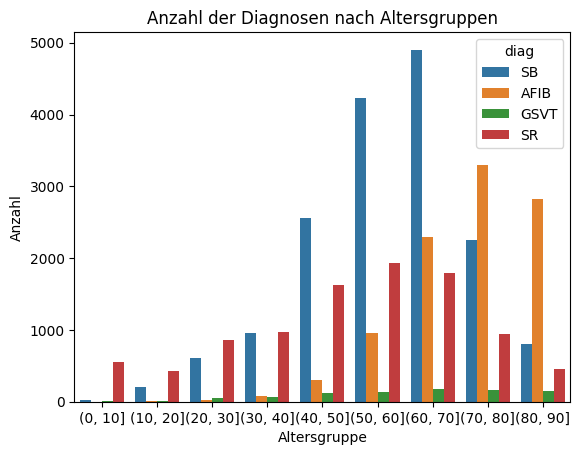

In [8]:
# barplot how many diagnosis are in each age group
fig, ax = plt.subplots()
sns.countplot(data=df_dgc, x='age_group', hue='diag', ax=ax)
plt.title('Anzahl der Diagnosen nach Altersgruppen')
plt.xlabel('Altersgruppe')
plt.ylabel('Anzahl')
plt.show()